In [35]:
import cifar10
import matplotlib.pyplot as plt

In [36]:
cifar10.data_path = "data/CIFAR-10/"

In [37]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context 

In [38]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [39]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [40]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [41]:
from sklearn.decomposition import PCA

In [42]:
import matplotlib.pyplot as plt

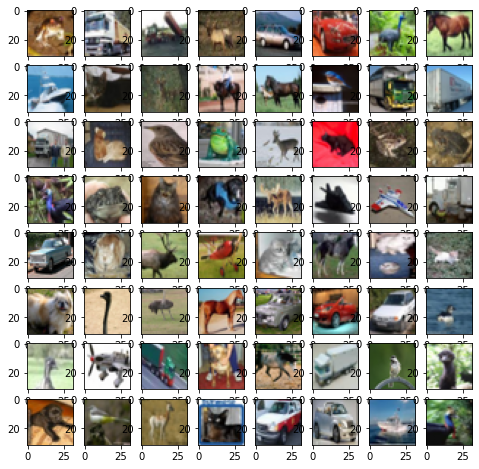

In [43]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)  # Subplot
    ax.imshow(images_train[i],cmap = plt.cm.bone)
plt.show()

In [44]:
p=images_train.shape[0]

In [45]:
images_train_reshaped= images_train.reshape(p,-1)

In [46]:
pca=PCA()
X_transformed=pca.fit_transform(images_train_reshaped)

In [47]:
k = 0
total = sum(pca.explained_variance_)
currentSum = 0
while currentSum/total < 0.99:
    currentSum += pca.explained_variance_[k]
    k =k + 1
k

658

In [48]:
pca = PCA(n_components = k, whiten = True)
images_train_reshaped = pca.fit_transform(images_train_reshaped)
images_train_reshaped.shape

(50000, 658)

In [49]:
images_approx=pca.inverse_transform(images_train_reshaped)
images_approx=images_approx.reshape((50000,32,32,3))
images_approx.shape

(50000, 32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

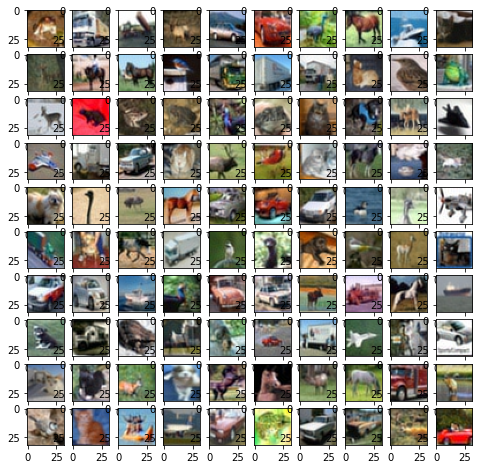

In [50]:
fig=plt.figure(figsize=(8,8))
for i in range(100):
    ax=fig.add_subplot(10,10,i+1)
    ax.imshow(images_approx[i])
plt.show()

In [51]:
images_test.shape

(10000, 32, 32, 3)

In [52]:
images_test_reshape=images_test.reshape(images_test.shape[0],-1)
images_test_reshape.shape

(10000, 3072)

In [53]:
images_test_transformed = pca.transform(images_test_reshape)
images_test_transformed.shape

(10000, 658)

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [55]:
clf=svm.SVC()

In [ ]:
clf = svm.SVC()
grid={'C':[1e2,1e4,1e1,5e3,1e3,5e2],
      'gamma':[1e-3,1e-2,5e-3,5e-2,1e-4,1e-5]}

svm=GridSearchCV(clf,grid,n_jobs=-1)
svm.fit(images_train_reshaped,cls_train)
print(svm.score(images_test_transformed,cls_test))

In [ ]:
predictions=[]
for i in range(len(cls_pred)):
    predictions.append(class_names[cls_pred[i]])
predictions

In [ ]:
np.savetxt("predictions_cifar10.csv", predictions, delimiter=',', fmt="%s")